In [3]:
import os
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram

from qiskit_aer import AerSimulator

from qiskit_ibm_runtime.fake_provider import FakeValenciaV2
from qiskit_ibm_runtime import SamplerV2

import matplotlib.pyplot as plt

from utils import export_data_json, generate_output_dir, generate_full_file_path

In [2]:
OUTPUT_PATH = os.path.join(os.getcwd(), 'repetition-code-tests')
generate_output_dir(OUTPUT_PATH)

Creating folder: /home/alexandre/projects/scientific-research-2-qec-and-qem/src/repetition-code-tests


In [4]:
fake_backend = FakeValenciaV2()
backend = AerSimulator.from_backend(fake_backend)
sampler = SamplerV2(backend=backend)
pm = generate_preset_pass_manager(optimization_level=3, backend=backend)

In [6]:
SHOTS = 1000

In [23]:
message_0 = QuantumRegister(2, name="message0")
message_1 = QuantumRegister(2, name="message1")

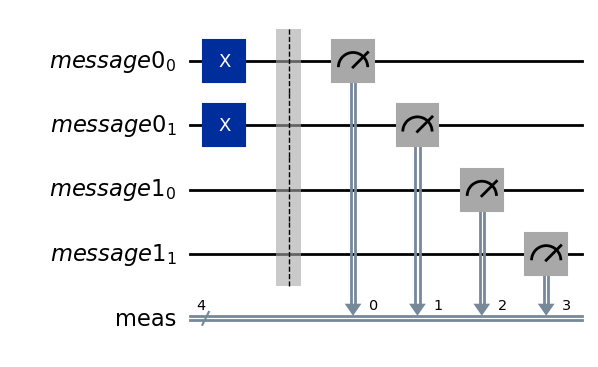

In [24]:
qc = QuantumCircuit(message_0, message_1)
qc.x(message_0)
qc.measure_all()
qc.draw('mpl')

In [26]:
isa_qc = pm.run(qc)

In [27]:
counts = sampler.run([isa_qc], shots=SHOTS).result()[0].data.meas.get_counts()

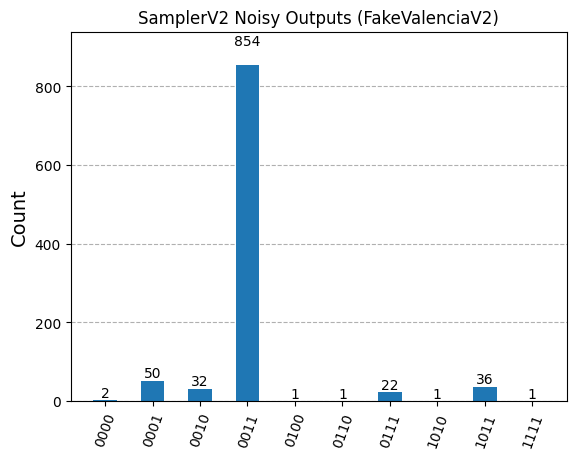

In [29]:
fig = plot_histogram(counts, title="SamplerV2 Noisy Outputs (FakeValenciaV2)")
fig.savefig(generate_full_file_path(OUTPUT_PATH, "sampler-noisy-ouputs.png"))
display(fig)

In [43]:
def clean(data):
    out_data = {}
    for k,v in data.items():
        message_0, message_1 = k[:2], k[2:]

        m00 = int(message_0[-1], 2) 
        m01 = int(message_0[-2], 2)

        m10 = int(message_1[-1], 2) 
        m11 = int(message_1[-2], 2)

        xor_check_m0 = m00^m01
        xor_check_m1 = m10^m11

        if(xor_check_m0 or xor_check_m1):
            continue
        out_data[k] = v
    return out_data

In [45]:
cleaned = clean(counts)
cleaned

{'0011': 854, '1111': 1, '0000': 2}

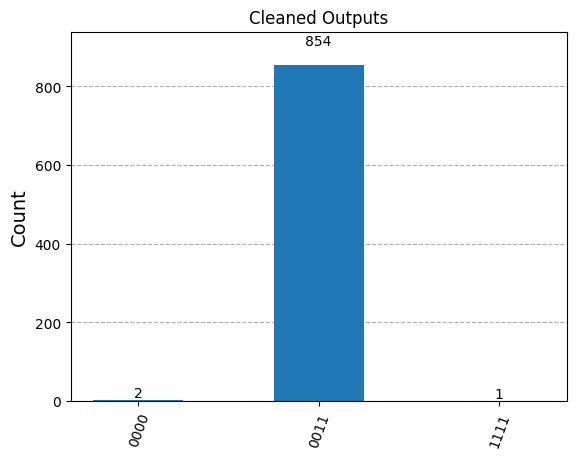

In [46]:
fig = plot_histogram(cleaned, title="Cleaned Outputs")
fig.savefig(generate_full_file_path(OUTPUT_PATH, "cleaned-ouputs.png"))
display(fig)